### Gold Price Prediction using Machine Learning with Python:

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [12]:
#Loading the csv data to Pandas DataFrame
gold_data=pd.read_csv('gld_price_data.csv')

In [13]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


--> SPX: also called S&P index, it's the capitilization of 500 campanies which are publicly traded.
--> GLD: it's the price of Gold that we are going to predict.
--> USO: United stated oil price for theses dates.
--> SLV: the sliver price value.
--> EUR/USD: Currency pair of european currency and united state dollar, (1euro = 1.47USD)

In [14]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
#number of rows and colums
gold_data.shape

(2290, 6)

In [17]:
#getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation: 
    1. Positive Correlation
    2. Negative Correlation

In [24]:
correlation = gold_data.corr()

<AxesSubplot:>

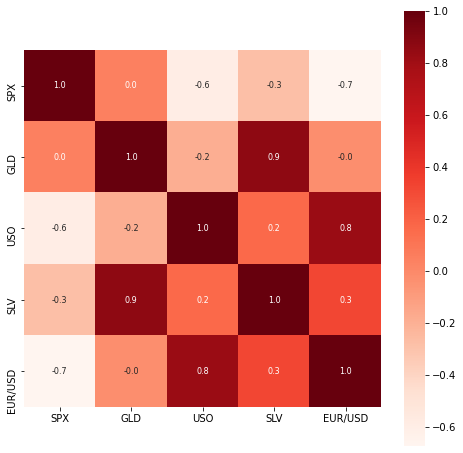

In [31]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

from this heat map we can see that: 
    --> The GLD and SLV are positvely correlated, means that if GLD increase also the SLV increase, and the coefficient of correlation is = 0.9.
    --> If we see the features SPX and USD they are negatively correlated, with coef of -0.6.

In [32]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\OUMAIMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

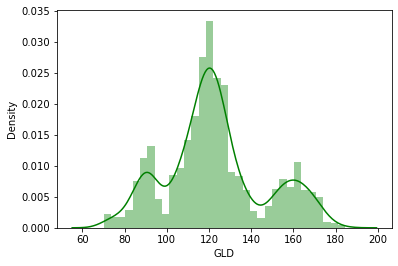

In [34]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [36]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [46]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

#### Model Trainig Random Forrest Regressor:

In [52]:
regressor = RandomForestRegressor(n_estimators=100)

In [53]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#### Model Evaluation

In [55]:
#prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.19519915  82.00070013 115.93790004 127.56850085 120.92480104
 154.81089717 150.36129877 126.23010034 117.60759858 126.01620065
 116.70530114 171.98000091 141.25049797 167.98909863 115.31439972
 117.74670034 137.41670382 170.11630072 158.74660327 158.72279881
 154.85290031 125.36010046 175.98919977 156.79230318 125.17800027
  93.76469947  76.82320043 120.87530005 119.00589865 167.30250029
  88.4505006  125.17639996  90.92640081 117.66420046 121.1268991
 136.71760078 115.58410123 115.03670062 148.36780019 107.47680089
 104.8108025   87.15029778 126.45650092 118.03459997 152.78139865
 119.45299996 108.33020004 108.27399849  93.12660019 126.99679855
  74.82820066 113.71779913 121.03800007 111.24219923 118.84569918
 120.89159962 158.57780007 167.53480134 147.02129682  85.68469846
  94.1628005   86.9011988   90.7289002  118.97260088 126.42490066
 127.57699977 170.53979994 122.23419943 117.38609907  98.3723003
 168.48080023 142.88669818 132.05420328 121.10770231 120.9780996
 119.83000031

In [59]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9883882972361879


Compare the Actual Values and Predicted Values in a Plot

In [60]:
Y_test = list(Y_test)

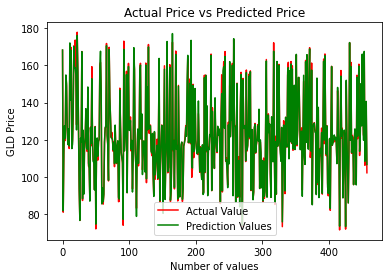

In [62]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Prediction Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()